# Importing Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import networkx as nx
from apyori import apriori
import matplotlib.pyplot as plt
from itertools import combinations
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Importing Dataset

In [6]:
data = pd.read_csv('groceries_data.csv')

# Converting to Binary Dataset

In [11]:
unique_items = list(set(data.values.ravel()))

item_to_index = {item: i for i, item in enumerate(unique_items)}

binary_matrix = []
for row in data.values:
    transaction = [0] * len(unique_items)
    for item in row:
        if pd.notna(item):
            transaction[item_to_index[item]] = 1
    binary_matrix.append(transaction)

binary_df = pd.DataFrame(binary_matrix, columns=unique_items)

binary_df['Total Items'] = binary_df.sum(axis=1)

binary_df.head(10)

,shopping bags,tea,hair spray,long life bakery product,liqueur,dental care,cereals,chocolate,mustard,NaN,...,meat spreads,fish,root vegetables,instant coffee,detergent,flower (seeds),flower soil/fertilizer,liver loaf,ham,Total Items
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Calculating Support, Lift, Confidence and other important measures

In [24]:
item_support = binary_df.mean()

item_support_count = binary_df.sum()

itemset_support = binary_df.mean(axis=0)

itemset_support_count = binary_df.sum()

def calculate_confidence(itemset, antecedent, item_support_count, itemset_support_count):
    antecedent_support_count = item_support_count[antecedent]
    itemset_support_count = itemset_support_count[itemset]
    return itemset_support_count / antecedent_support_count

def calculate_lift(itemset, antecedent, itemset_support_count, itemset_support):
    antecedent_support = itemset_support[antecedent]
    itemset_support = itemset_support[itemset]
    return itemset_support / (antecedent_support * itemset_support_count)

print("Item Support:")
print(item_support)
print("\nItem Support Count:")
print(item_support_count)
print("\nItemset Support:")
print(itemset_support)
print("\nItemset Support Count:")
print(itemset_support_count)

Item Support:
shopping bags                0.098526
tea                          0.003864
hair spray                   0.001118
long life bakery product     0.037417
liqueur                      0.000915
                              ...    
Total Items                  4.409456
Support                      0.001603
Support Count               15.764108
Confidence                   0.094628
Lift                         0.000000
Length: 175, dtype: float64

Item Support Count:
shopping bags                  969.000000
tea                             38.000000
hair spray                      11.000000
long life bakery product       368.000000
liqueur                          9.000000
                                ...      
Total Items                  43367.000000
Support                         15.764108
Support Count               155040.000000
Confidence                     930.663279
Lift                             0.000000
Length: 175, dtype: float64

Itemset Support:
shopping ba

# Exporting CSV file for binarized data

In [27]:
binary_df.to_csv("binary_data.csv")

## Exporting Computed Measures for all items in separate CSV file

In [30]:
item_support = binary_df.mean()

item_support_count = binary_df.sum()
item_measures_df = pd.DataFrame(columns=['Item Name', 'Support', 'Count', 'Support Count'])
item_names = [col for col in binary_df.columns if col not in ['Total Items', 'Support', 'Support Count', 'Confidence', 'Lift']]

for item in item_names:
    support = item_support[item]
    count = binary_df[item].sum()
    support_count = item_support_count[item]
    item_measures_df = item_measures_df.append({'Item Name': item, 'Support': support, 'Count': count, 'Support Count': support_count}, ignore_index=True)

item_measures_df.to_csv("Item_Measures.csv")

C:\Users\momin\AppData\Local\Temp\ipykernel_24952\2805686961.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_measures_df = item_measures_df.append({'Item Name': item, 'Support': support, 'Count': count, 'Support Count': support_count}, ignore_index=True)
C:\Users\momin\AppData\Local\Temp\ipykernel_24952\2805686961.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_measures_df = item_measures_df.append({'Item Name': item, 'Support': support, 'Count': count, 'Support Count': support_count}, ignore_index=True)
C:\Users\momin\AppData\Local\Temp\ipykernel_24952\2805686961.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_measures_df = item_measures_df.append({'Item Name': item, 'Support': support, 'Count

# Previewing Computed Measures

In [31]:
item_measures_df.head(10)

,Item Name,Support,Count,Support Count
0,shopping bags,0.098526,969,969.0
1,tea,0.003864,38,38.0
2,hair spray,0.001118,11,11.0
3,long life bakery product,0.037417,368,368.0
4,liqueur,0.000915,9,9.0
5,dental care,0.005796,57,57.0
6,cereals,0.005694,56,56.0
7,chocolate,0.049619,488,488.0
8,mustard,0.011998,118,118.0
9,NaN,0.000000,0.0,0.0


# Setting thresholds and making pairs of qualified items

In [33]:
support_thresholds = {}  
for _, row in item_measures_df.iterrows():
    support_thresholds[row['Item Name']] = row['Support']

qualified_items = [item for item, support in support_thresholds.items() if support >= 0.1]  
itemset_pairs_two = list(combinations(qualified_items, 2))
itemset_pairs_two_df = pd.DataFrame(itemset_pairs_two, columns=['Item 1', 'Item 2'])
print(itemset_pairs_two_df)

              Item 1            Item 2
0     tropical fruit        whole milk
1     tropical fruit        rolls/buns
2     tropical fruit     bottled water
3     tropical fruit              soda
4     tropical fruit            yogurt
5     tropical fruit  other vegetables
6     tropical fruit   root vegetables
7         whole milk        rolls/buns
8         whole milk     bottled water
9         whole milk              soda
10        whole milk            yogurt
11        whole milk  other vegetables
12        whole milk   root vegetables
13        rolls/buns     bottled water
14        rolls/buns              soda
15        rolls/buns            yogurt
16        rolls/buns  other vegetables
17        rolls/buns   root vegetables
18     bottled water              soda
19     bottled water            yogurt
20     bottled water  other vegetables
21     bottled water   root vegetables
22              soda            yogurt
23              soda  other vegetables
24              soda   ro

# Showing all Frequent Itemset Pairs Found

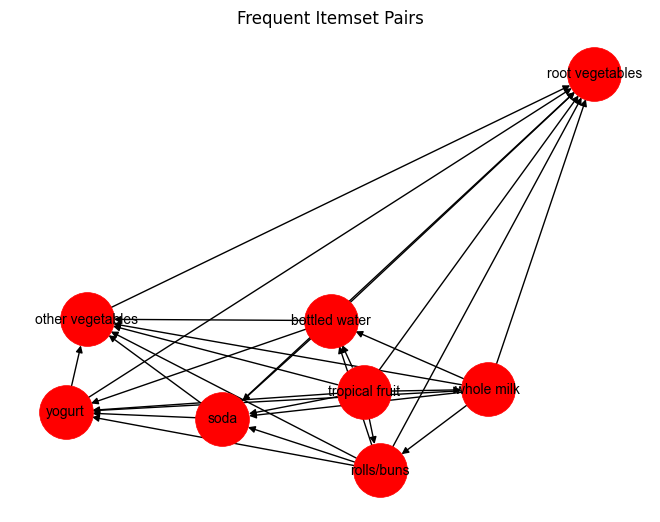

In [47]:
G = nx.DiGraph()
for _, row in itemset_pairs_two_df.iterrows():
    G.add_edge(row['Item 1'], row['Item 2'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='red', node_size=1500, edge_color='black', linewidths=0.5, font_size=10, font_family='Arial')

plt.title('Frequent Itemset Pairs')
plt.show()